In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

x = np.array(df['RM'])
y = np.array(df['target'])

scaler = MinMaxScaler()
scale_x = scaler.fit_transform(x.reshape(-1, 1))


c:\Users\AY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [386]:
def least_squares_fit(x, y):
    w = np.corrcoef(x, y) * np.std(y) / np.std(x)
    b = np.mean(y) - w * np.mean(x)
    return w, b

In [387]:
def predict(x, w, b)-> float:
    return x * w + b

In [388]:
def MSE(x, w, b, y)-> float:
    error = (y - predict(x, w, b))**2 / len(y)
    return error

In [389]:
def cost_function(x, w, b, y)-> float:
    error = MSE(x, w, b, y)
    return 1 / 2 * error

In [406]:
# gradient desent
num_epoch = 10000
errors = []

# 학습률
learning_rate = 0.01

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 9.29411, b = -33.22993 error = 63.72699
 5 w = 8.91510, b = -33.29036 error = 43.72702
10 w = 8.88807, b = -33.29545 error = 43.62438
15 w = 8.88626, b = -33.29659 error = 43.62382
20 w = 8.88625, b = -33.29743 error = 43.62379
25 w = 8.88637, b = -33.29826 error = 43.62376
30 w = 8.88650, b = -33.29908 error = 43.62373
35 w = 8.88663, b = -33.29991 error = 43.62371
40 w = 8.88676, b = -33.30073 error = 43.62368
45 w = 8.88689, b = -33.30156 error = 43.62365
50 w = 8.88701, b = -33.30238 error = 43.62362
55 w = 8.88714, b = -33.30320 error = 43.62360
60 w = 8.88727, b = -33.30402 error = 43.62357
65 w = 8.88740, b = -33.30484 error = 43.62354
70 w = 8.88753, b = -33.30567 error = 43.62351
75 w = 8.88766, b = -33.30649 error = 43.62348
80 w = 8.88779, b = -33.30731 error = 43.62346
85 w = 8.88792, b = -33.30813 error = 43.62343
90 w = 8.88805, b = -33.30894 error = 43.62340
95 w = 8.88818, b = -33.30976 error = 43.62337
100 w = 8.88830, b = -33.31058 error = 43.62335
105 w = 8.88

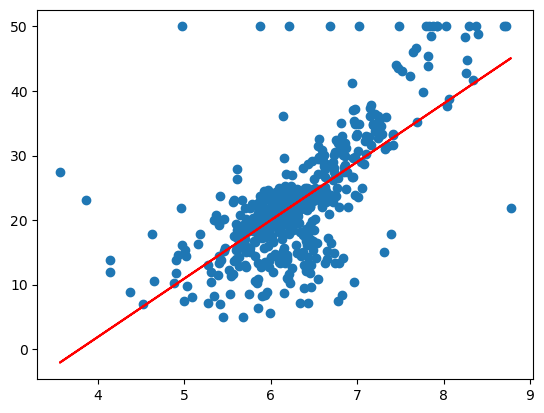

In [407]:
plt.scatter(x, y)
plt.plot(x, predict(x, w, b), color='red')

# Logistic Regression

In [368]:
def log_odds(features, coefficients, intercept):
  z = np.dot(features, coefficietns) + intercept
  return z

In [369]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [370]:
def log_loss(y_pred, y_true):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss

In [371]:
def gradient_db(x, y, w, b):
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [372]:
def gradient_dw(x, y, w, b, alpha, N):
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

In [373]:
def predict_class(features, coefficients, intercept, threshold):
  z = log_odds(features, coefficients, intercept)
  a = sigmoid(z)

  return np.where(a >= threshold, 1, 0)

In [374]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 데이터 생성
X, y = make_classification(n_samples = 50000, n_features = 15, 
                    n_informative = 10, n_redundant = 5, 
                    n_classes = 2, weights = [0.7], 
                    class_sep = 0.7, random_state=15)

# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 15)

# 데이터 정규화 
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

# w, b 초기화
w = np.zeros_like(X_train[0])
b = 0

# 학습률, 반복 설정
alpha  = 0.0001
eta0   = 0.0001
epochs = 50

N = len(X_train)
log_loss_train = []
log_loss_test = []

for i in range(0, epochs):
    for j in range(N):
        grad_dw = gradient_dw(x_train_standard[j], y_train[j], w, b, alpha, N)
        grad_db = gradient_db(x_train_standard[j], y_train[j], w, b)
        w = np.array(w) + (eta0 * np.array(grad_dw))
        b = b + (eta0 * grad_db)

    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, x_train_standard[m])+b
        predict_train.append(sigmoid(z)) 
    
    train_loss = log_loss(y_train, predict_train)

    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, x_test_standard[m])+b
        predict_test.append(sigmoid(z))
    
    test_loss = log_loss(y_test, predict_test)


    if log_loss_train and train_loss > log_loss_train[-1]: 
        break
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

C:\Users\AY\AppData\Local\Temp\ipykernel_17504\3679002326.py:4: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))


In [375]:
print ("weight vector: ", w)
print ("Intercept: ", b)

weight vector:  [-0.97125471  0.6951594  -0.1064887   0.68159065 -0.4447256   1.00799626
 -0.94341151 -0.07316669  0.44633501  0.47814799  0.27402291  0.06013621
 -0.09610527  0.57042941  0.06404642]
Intercept:  -1.3691399553813899


In [376]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf.fit(x_train_standard, y_train)
clf.coef_, clf.intercept_ 

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

# L1 regularization

# Logistic Regression

In [314]:
def log_odds(features, coefficients, intercept):
  z = np.dot(features, coefficietns) + intercept
  return z

In [315]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [341]:
def log_loss(y_pred, y_true):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss

In [342]:
def gradient_db(x, y, w, b):
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [343]:
def gradient_dw(x, y, w, b, alpha, N):
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

In [344]:
def predict_class(features, coefficients, intercept, threshold):
  z = log_odds(features, coefficients, intercept)
  a = sigmoid(z)

  return np.where(a >= threshold, 1, 0)

In [351]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 생성
X, y = make_classification(n_samples = 50000, n_features = 15, 
                    n_informative = 10, n_redundant = 5, 
                    n_classes = 2, weights = [0.7], 
                    class_sep = 0.7, random_state=15)

# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 15)

# 데이터 정규화 
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

# w, b 초기화
w = np.zeros_like(X_train[0])
b = 0

# 학습률, 반복 설정
alpha  = 0.0001
eta0   = 0.0001
epochs = 50

N = len(X_train)
log_loss_train = []
log_loss_test = []

for i in range(0, epochs):
    for j in range(N):
        grad_dw = gradient_dw(x_train_standard[j], y_train[j], w, b, alpha, N)
        grad_db = gradient_db(x_train_standard[j], y_train[j], w, b)
        w = np.array(w) + (eta0 * np.array(grad_dw))
        b = b + (eta0 * grad_db)

    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, x_train_standard[m])+b
        predict_train.append(sigmoid(z)) 
    
    train_loss = log_loss(y_train, predict_train)

    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, x_test_standard[m])+b
        predict_test.append(sigmoid(z))
    
    test_loss = log_loss(y_test, predict_test)


    if log_loss_train and train_loss > log_loss_train[-1]: 
        break
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

C:\Users\AY\AppData\Local\Temp\ipykernel_17504\3679002326.py:4: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))


In [352]:
print ("weight vector: ", w)
print ("Intercept: ", b)

weight vector:  [-0.97125471  0.6951594  -0.1064887   0.68159065 -0.4447256   1.00799626
 -0.94341151 -0.07316669  0.44633501  0.47814799  0.27402291  0.06013621
 -0.09610527  0.57042941  0.06404642]
Intercept:  -1.3691399553813899


In [353]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf.fit(x_train_standard, y_train)
clf.coef_, clf.intercept_ 

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

In [ ]:
# gradient desent
num_epoch = 1000
errors = []

# 학습률
learning_rate = 0.005

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=10.0, high=50.0)
b = np.random.uniform(low=10.0, high=50.0)

for epoch in range(num_epoch):
    y_predict = predict(scale_x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

# L1 regularization